# Table of Contents

# Introduction
Created by: 
- Gayatri Ayodhya
- Gmail: gayatriayudi@gmail.com
- Linkedin: https://www.linkedin.com/in/gayatri-ayodhya-1329b3227/

# Dataset Description
The goal of the project is to Predict who is likely going to click on the Ad on a website based on the features of a user. Following are the features involved in this dataset which is obtained from 
<a href="https://www.rakamin.com/">Rakamin Academy</a>.

| Feature | Description | Type | 
| :- | :- | :- |
| Unnamed: 0 | ID Customers| Numeric | 
| Daily Time Spent on a Site | Time spent by the user on a site in minutes. | Numeric | 
| Age  | Customer's age in terms of years. | Numeric | 
| Area Income  | Average income of geographical area of consumer. | Numeric | 
| Daily Internet Usage | Avgerage minutes in a day consumer is on the internet. | Numeric | 
| Male | Whether or not a consumer was male. | Categorical | 
| Timestamp | Time at which user clicked on an Ad or the closed window. | Categorical | 
| Clicked on Ad  | No or Yes is indicated clicking on an Ad. | Target Variable | 
| city | City of the consumer. | Categorical | 
| province | Province of the consumer. | Categorical | 
| category | Category of the advertisement. | Categorical | 

# Objective
Create a model for predicting customer who clicked ads.

The main objective can be broken down into 4:

1. Create a machine learning model that can detect potential users to convert or be interested in an ads click. So that we can optimize the cost of advertising on digital platforms. The algorithm model that will compare the performance results consists of Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, XGBoost, and Gradient Boosting.
2. Decide which algorithm that we will use based on the best performance on the chosen metrics.
3. Analyzing the important factors that determine the user to convert based on the EDA results and the feature importance of the selected algorithm model.
4. Calculate the possible revenue that will be obtained after implementing machine learning.

# Import Library

In [1]:
pip install -U ppscore

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
import seaborn as sns

In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance
import ppscore as pps

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading
Loading dataset into df dataframe using function read_csv.

In [8]:
df = pd.read_csv('Clicked Ads Dataset.csv')

## Dataset Exploration

In [9]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [10]:
df.tail()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank
999,999,45.01,26,209130600.0,178.35,Perempuan,6/3/2016 21:43,Yes,Serang,Banten,Travel


In [11]:
print(f'Rows, Cols: {df.shape[0], df.shape[1]}')
df.info()

Rows, Cols: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


- Clicked Ads Dataset contains 1K rows and 11 columns. Amongst the columns, we have the target variable which is named 'Clicked on Ad'.
- This dataset is a mix of numerical and categorical variables.
- The target variable is in categorical data type, this will be converted before the data preprocessing stage.

In [12]:
num_cols = list(df.select_dtypes('number').columns)
print(num_cols)

['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


These are the descriptive statistics of the numerical variable in the dataset.

In [13]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


We can see that there's no variables that have skewed distribution according to the differences between its mean and median. But we can't be sure just by looking at the mere differences, we have to check the distribution plot and skewness value.

In [14]:
df.select_dtypes(object).describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


There are two categorical variables has values that have low cardinality (less unique value) including male and Clicked on Ad. The cardinality of the categorical variable is needed to be checked because we don't want the model to consume a lot of time in running the algorithm its time complexity is affected by the number of features. Therefore if the cardinality of some categorical variable affects the model result, we should consider another method of encoding except one-hot encoding.

# Data Cleaning

## Missing Value

In [15]:
df.isnull().any()

Unnamed: 0                  False
Daily Time Spent on Site     True
Age                         False
Area Income                  True
Daily Internet Usage         True
Male                         True
Timestamp                   False
Clicked on Ad               False
city                        False
province                    False
category                    False
dtype: bool

In [16]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Several columns have missing values, these columns are Daily Time Spent on Site, Area Income, Daily Internet Usage, and Male. Because the missing value is still less than 5%, it can be filled with statistical values such as mean, median, and mode

In [17]:
# Daily Time Spent on Site and Daily Internet Usage columns have approximately symmetric skewness, so they are filled with the mean
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
# Area Income column has moderately skewness, so they are filled with the median
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
# the Male column is filled with the mode value because it is a category column
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [18]:
df.isnull().any()

Unnamed: 0                  False
Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Male                        False
Timestamp                   False
Clicked on Ad               False
city                        False
province                    False
category                    False
dtype: bool

## Duplicated Value

In [19]:
df.duplicated().any()

False

# Data Exploration (EDA)

## Numerical Features

In [20]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 5 : ['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


### Univariate

In [21]:
num_cols_skewness = df[num_cols].skew()

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

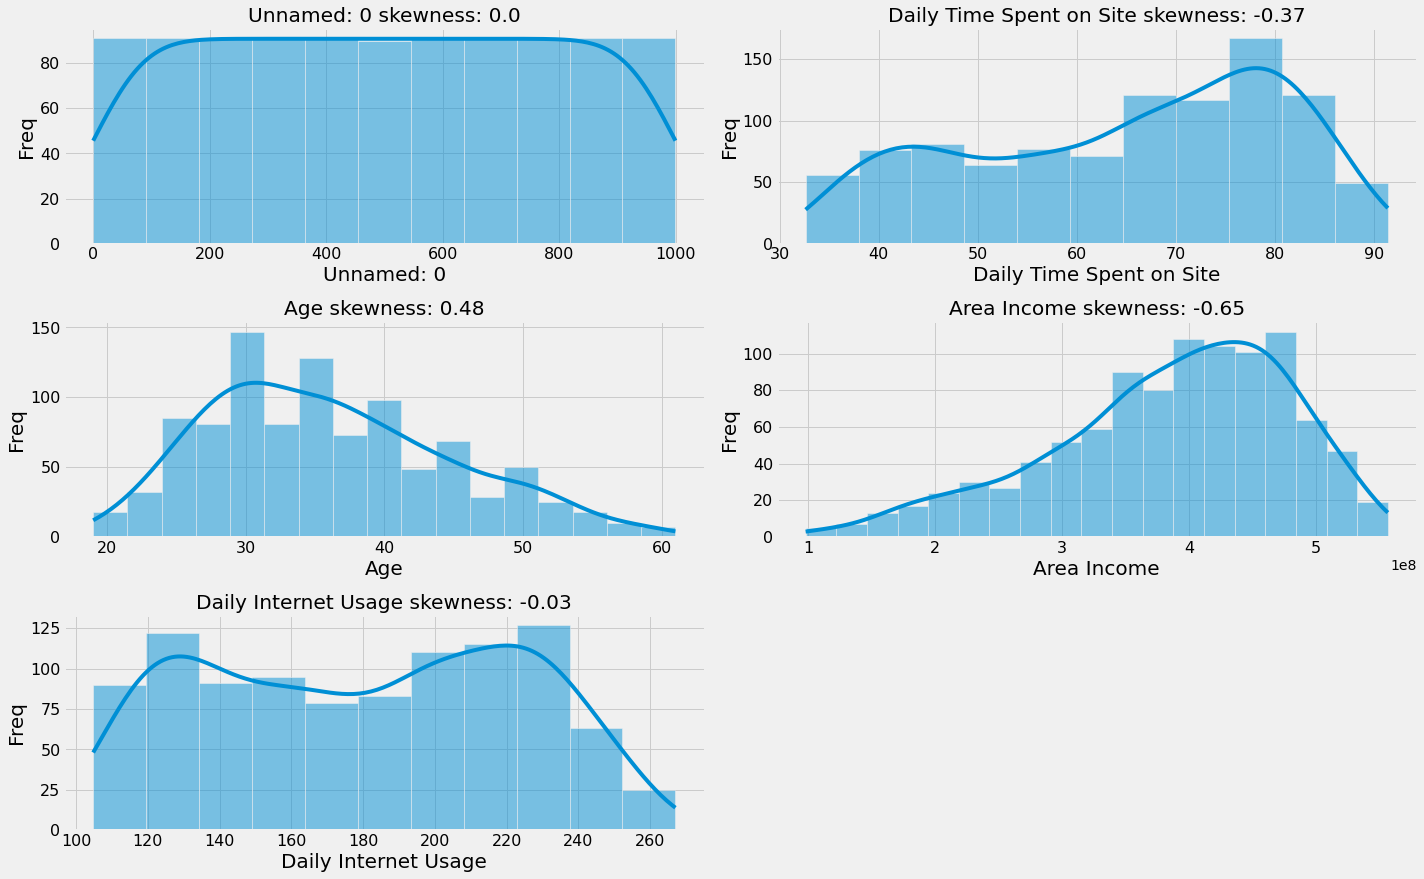

In [22]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//1, 2, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.savefig('num histplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

Almost all numerical columns have approximately symmetric skewness, there is only 1 moderately skewed numeric variable, namely 'Area Income'

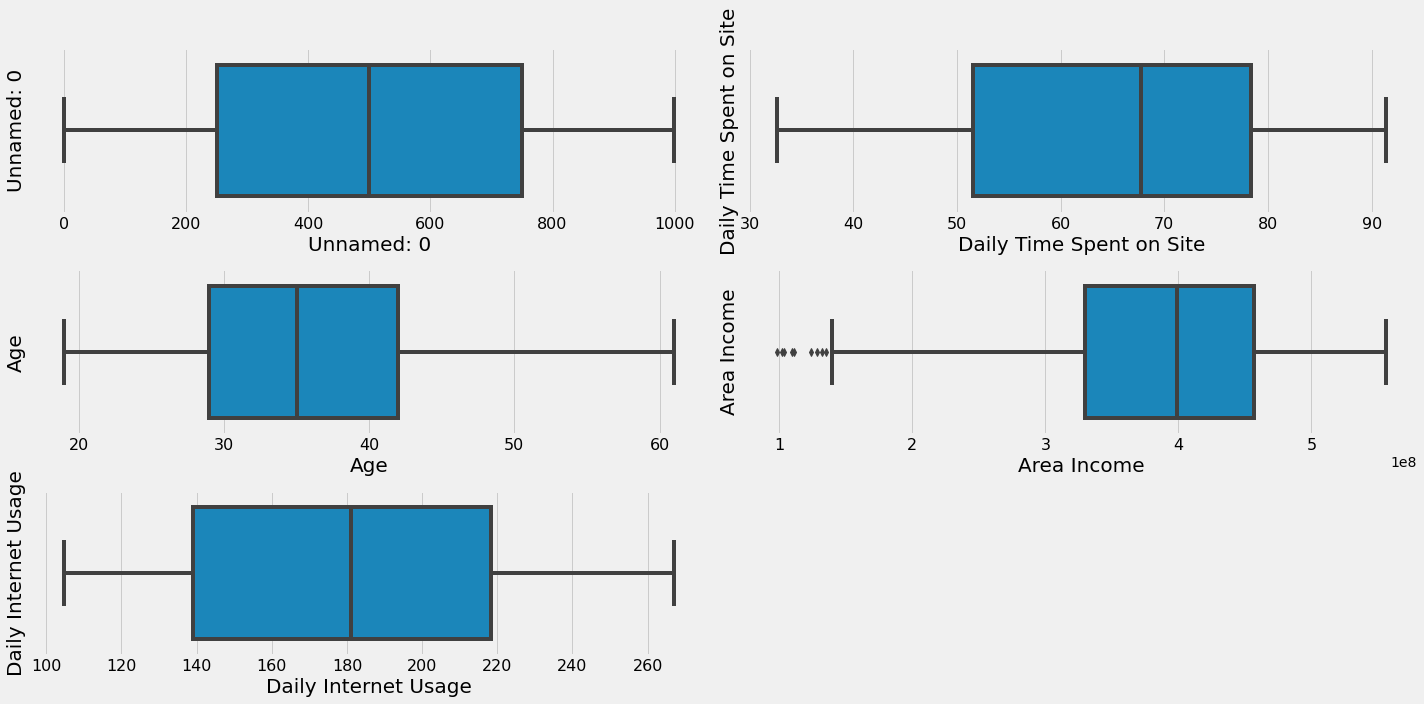

In [23]:
plt.figure(figsize=(20, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//1, 2, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel(str(num_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('num boxplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

Almost all numeric columns have no outliers except the 'Area Income' column

### Bivariate

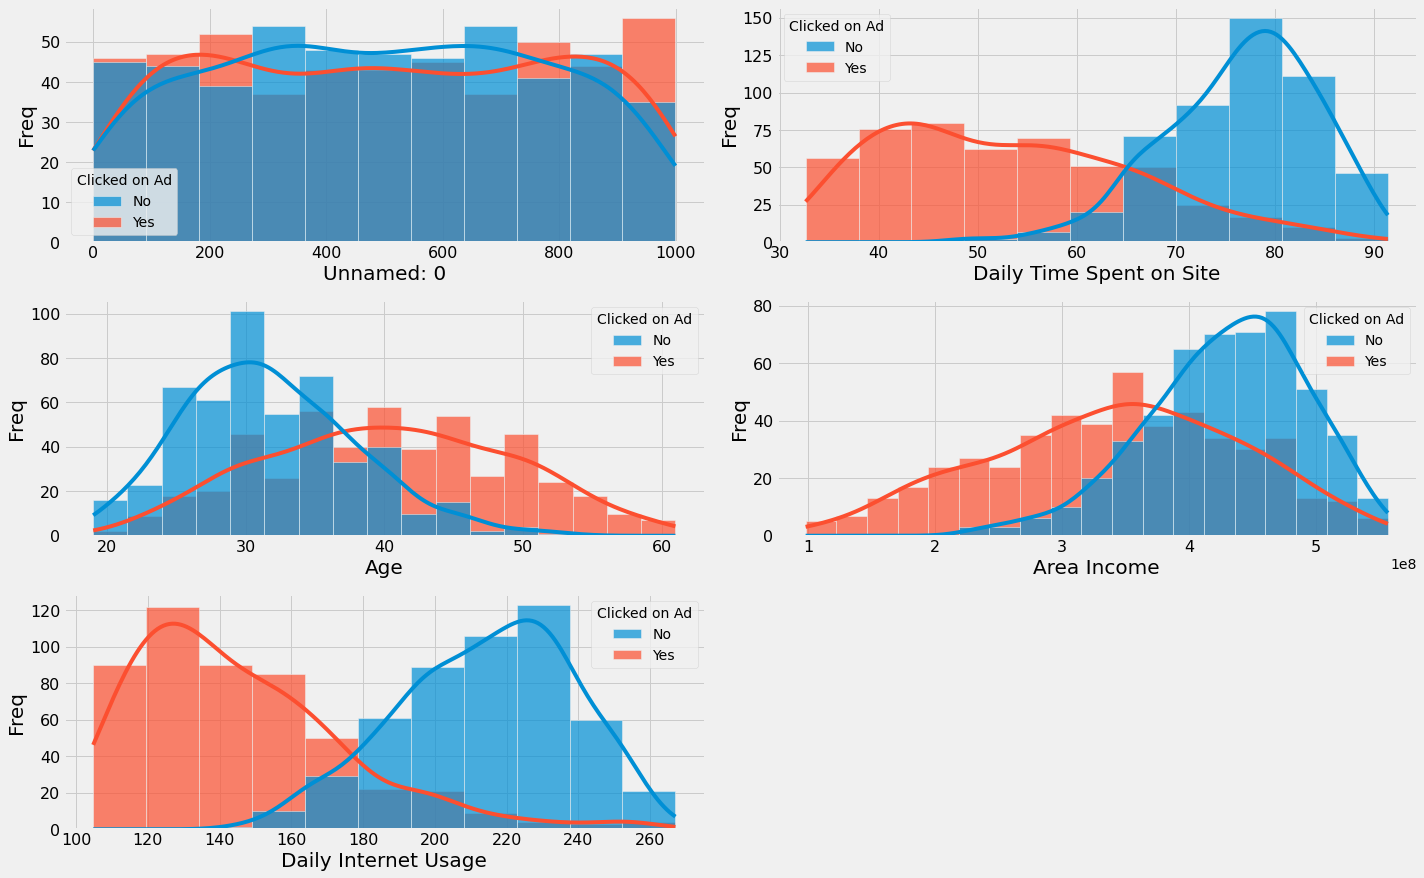

In [24]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//1, 2, i+1)
    ax = sns.histplot(
        x = df[num_cols[i]],
        kde = True,
        #ue_order = ["yes", "no"],
        #alette = {"yes":"maroon", "no":"mediumturquoise"},
        hue = df["Clicked on Ad"],
        alpha = 0.7
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('num histplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

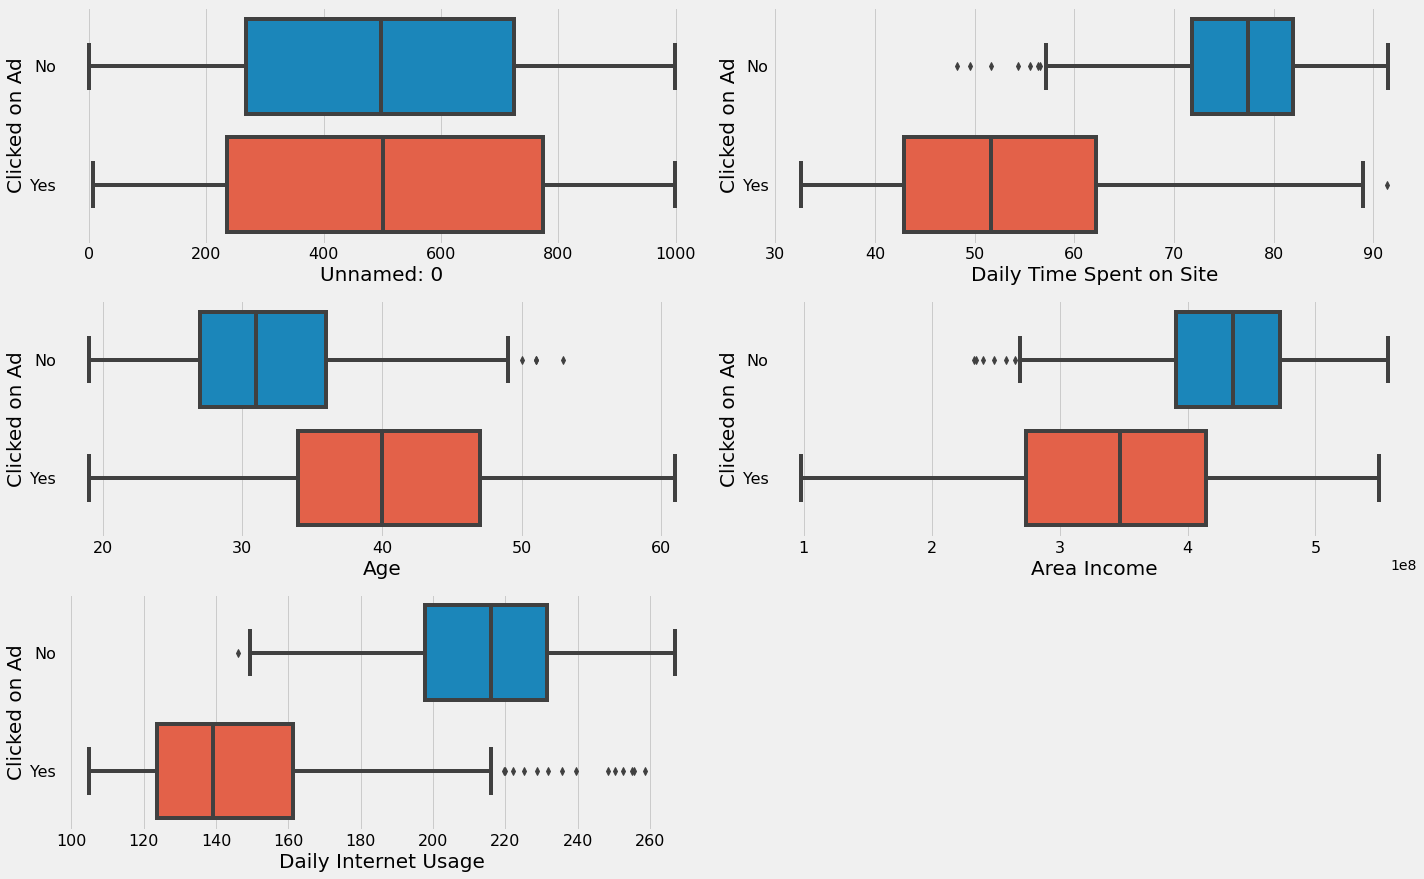

In [25]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//1, 2, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]],
        y = df["Clicked on Ad"],
        #palette = {"yes":"maroon", "no":"mediumturquoise"},
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Clicked on Ad", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('num boxplot biv.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

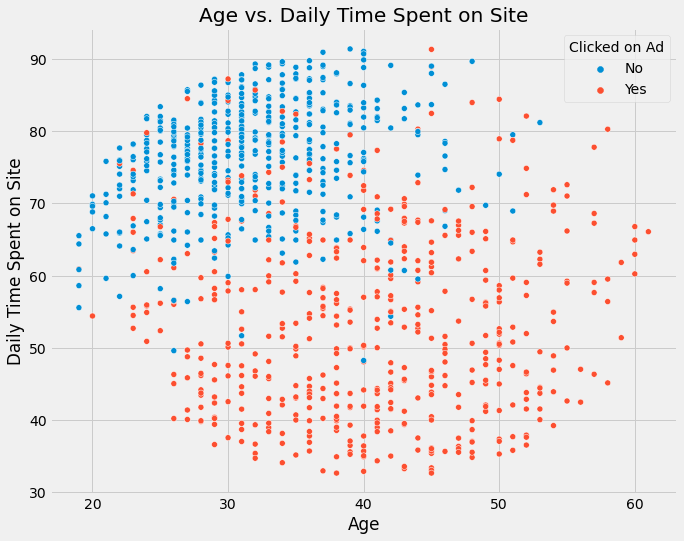

In [26]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(x = 'Age', y= 'Daily Time Spent on Site', hue='Clicked on Ad', data = df)
plt.title('Age vs. Daily Time Spent on Site')
plt.show()

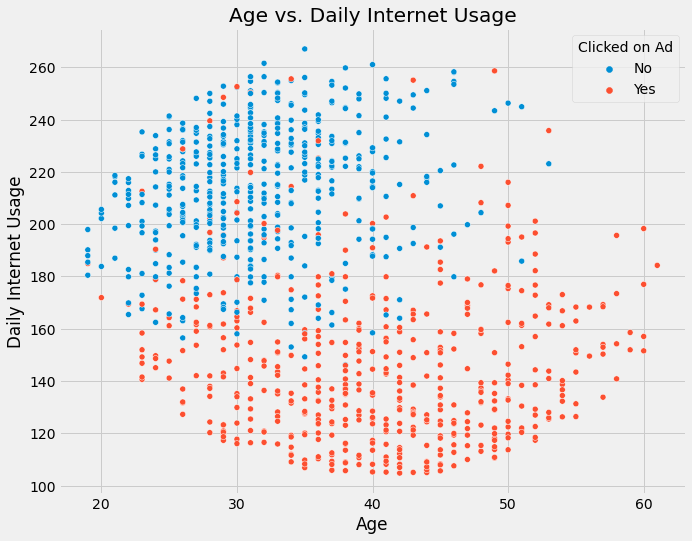

In [27]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(x = 'Age', y= 'Daily Internet Usage', hue='Clicked on Ad', data = df)
plt.title('Age vs. Daily Internet Usage')
plt.show()

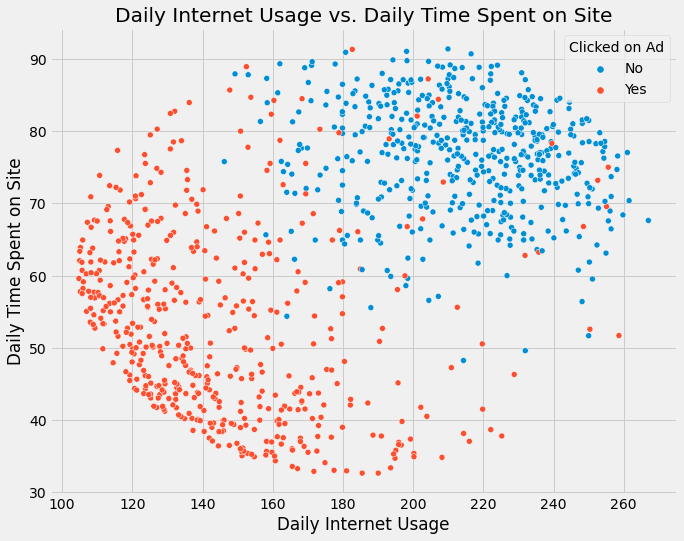

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])
plt.title('Daily Internet Usage vs. Daily Time Spent on Site')
plt.show()

### Statistic analysis

In [29]:
df.groupby(['Clicked on Ad']).median()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
No,497.0,77.455,31.0,435281665.0,216.015
Yes,501.5,51.630,40.0,346928575.0,139.015


In [30]:
df.groupby(['Clicked on Ad']).agg({'Age':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

Age                                                    
              median    mean max min ptp       std <lambda_0> <lambda_1>
Clicked on Ad                                                           
No              31.0  31.684  53  19  34  6.212998       27.0       36.0
Yes             40.0  40.334  61  19  42  8.856598       34.0       47.0

In [31]:
df.groupby(['Clicked on Ad']).agg({'Daily Time Spent on Site':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

Daily Time Spent on Site                                  \
                                median       mean    max    min    ptp   
Clicked on Ad                                                            
No                              77.455  76.598072  91.43  48.22  43.21   
Yes                             51.630  53.260975  91.37  32.60  58.77   

                                                
                     std <lambda_0> <lambda_1>  
Clicked on Ad                                   
No              7.643672     71.820    81.9825  
Yes            12.837061     42.915    62.2150

In [32]:
df.groupby(['Clicked on Ad']).agg({'Area Income':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

Area Income                                          \
                    median          mean          max          min   
Clicked on Ad                                                        
No             435281665.0  4.294155e+08  556393600.0  232674400.0   
Yes            346928575.0  3.406831e+08  549646930.0   97975500.0   

                                                                    
                       ptp           std   <lambda_0>   <lambda_1>  
Clicked on Ad                                                       
No             323719200.0  6.216260e+07  391068632.5  472590387.5  
Yes            451671430.0  9.841556e+07  273926537.5  414176525.0

In [33]:
df.groupby(['Clicked on Ad']).agg({'Daily Internet Usage':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

Daily Internet Usage                                      \
                            median        mean     max     min     ptp   
Clicked on Ad                                                            
No                         216.015  214.108991  267.01  146.19  120.82   
Yes                        139.015  145.618249  258.62  104.78  153.84   

                                                
                     std <lambda_0> <lambda_1>  
Clicked on Ad                                   
No             24.142474    197.780   231.6550  
Yes            29.623631    123.635   161.3625

- Customers who clicked advertisements on websites had a median age of 31-40 years.
- Based on the distribution of daily internet usage (in minutes), higher potential for users to click on a product for users who rarely use the internet than those who often use the internet.
- Users who don't click on ads also have more Area Income on average than those who click.
- Meanwhile, more of time spent at website in average for users who do not click on ads. 
- From the results of the scatterplot between internet use and length of visit to a website, it shows a pattern that is divided into 2 segments, namely active users and non-active users, where active users tend to be less likely to click on ads on websites than non-active users.

## Categorical Features

### Univariate

In [34]:
cat_cols = list(df.select_dtypes(object).drop(columns=["Clicked on Ad"]).columns)
cat_cols[2], cat_cols[1] = cat_cols[1], cat_cols[2]
print("Cat Features Length",len(cat_cols), ":", cat_cols)

Cat Features Length 5 : ['Male', 'city', 'Timestamp', 'province', 'category']


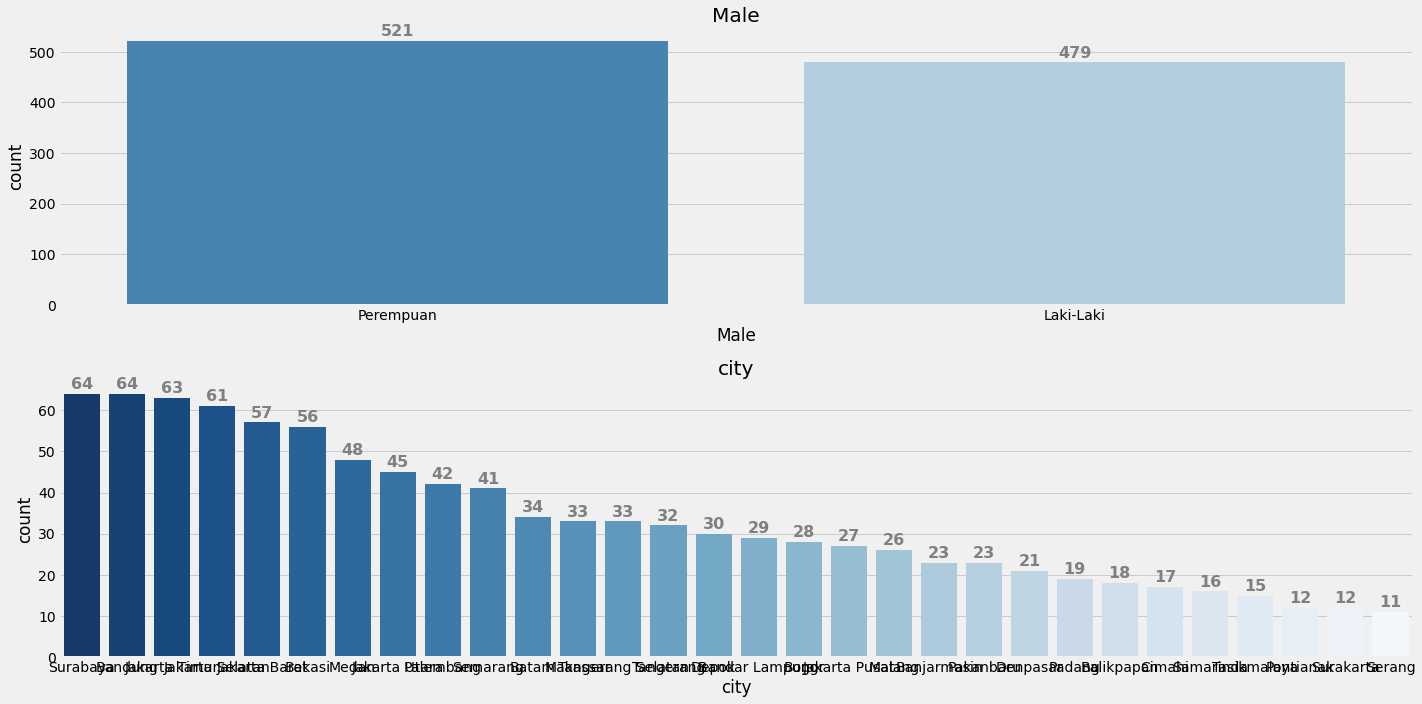

In [35]:
# plot all categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        # order by frequency
        order = df[cat_cols[:2][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[:2][i], fontweight = 20)
plt.tight_layout()
plt.savefig('cat countplot1.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

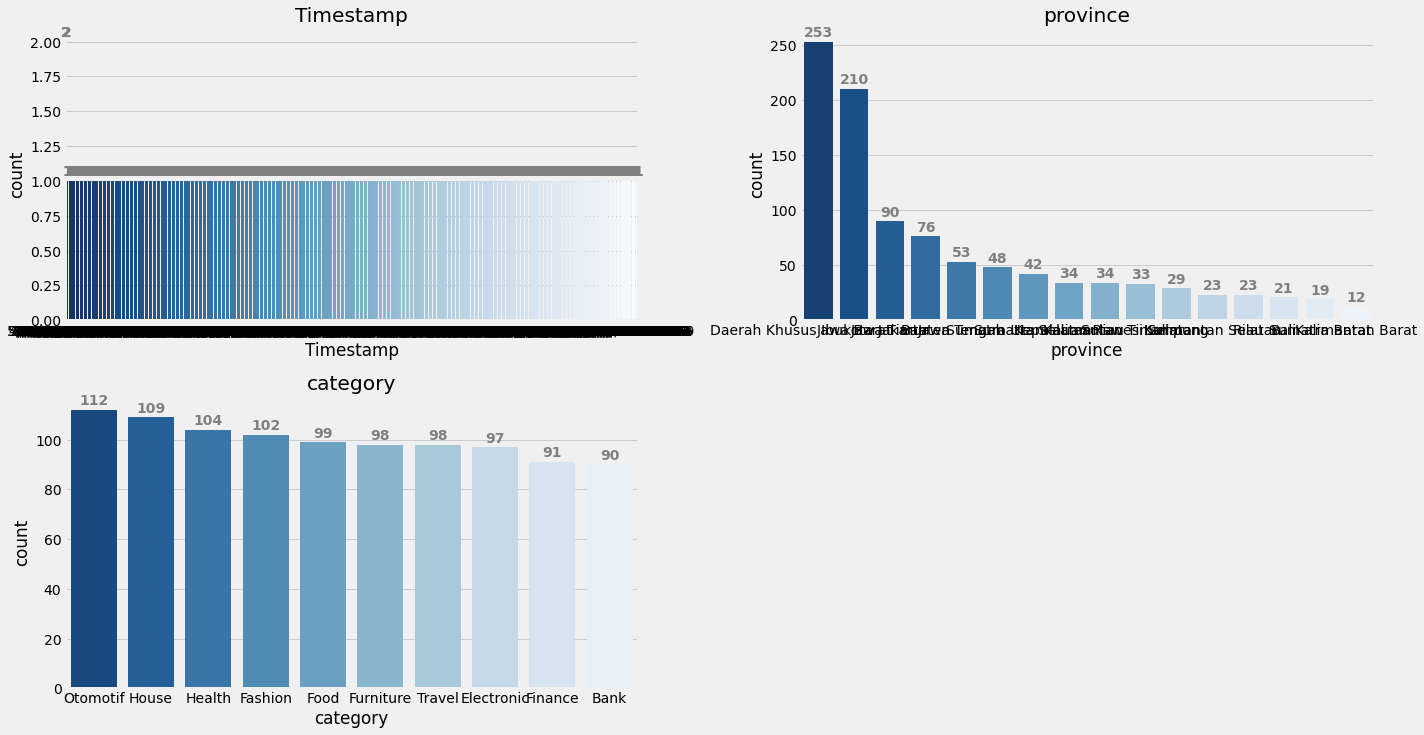

In [36]:
# plot all categorical features
plt.figure(figsize = (20, 15))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        # order by frequency
        order = df[cat_cols[2:][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[2:][i], fontweight = 20)
plt.tight_layout()
plt.savefig('cat countplot2.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

### Bivariate

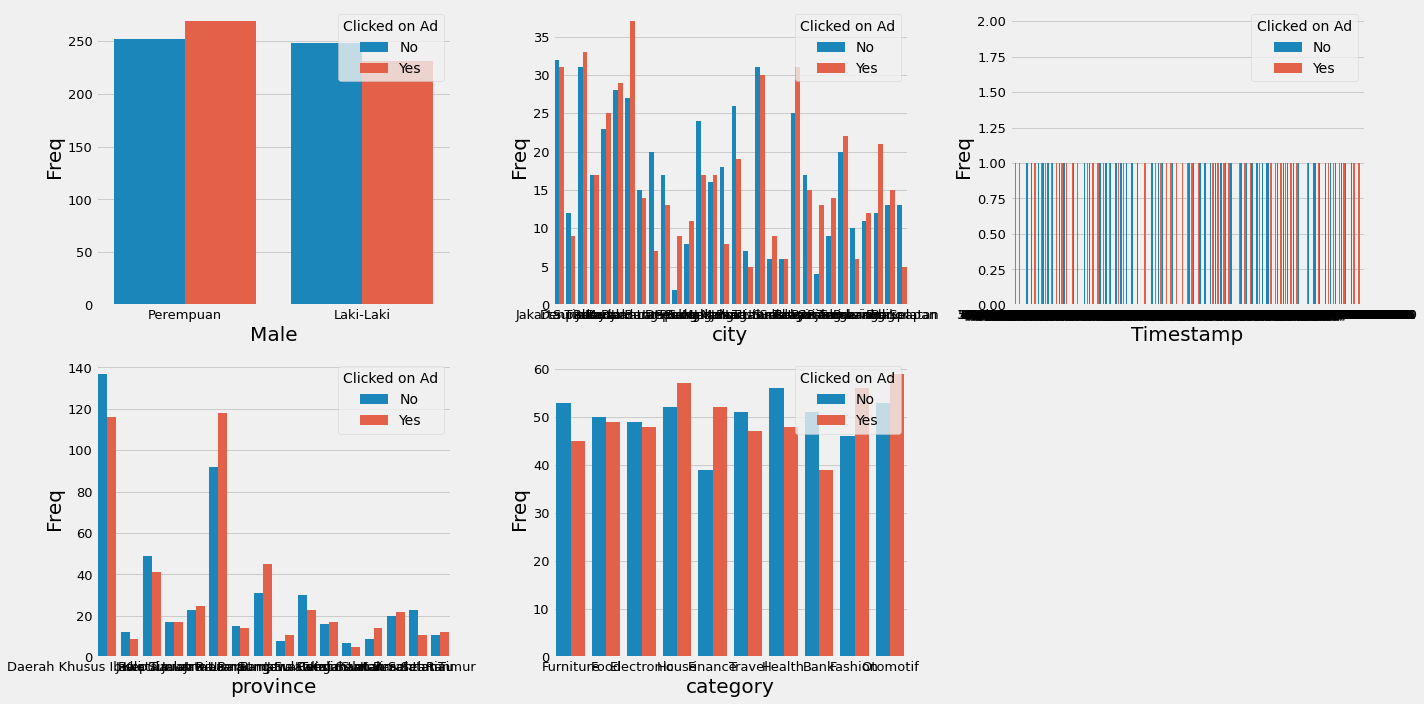

In [37]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    ax = sns.countplot(x = df[cat_cols[i]], hue=df['Clicked on Ad'], palette=["C0", "C1"], orient='v')
    ax.set_xlabel(str(cat_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=13)
    ax.set_ylabel("Freq", fontsize = 20)
    plt.tight_layout()
plt.savefig("count plot.jpg", dpi=150)

## Multivariate

### Pairplot

<Figure size 1440x1440 with 0 Axes>

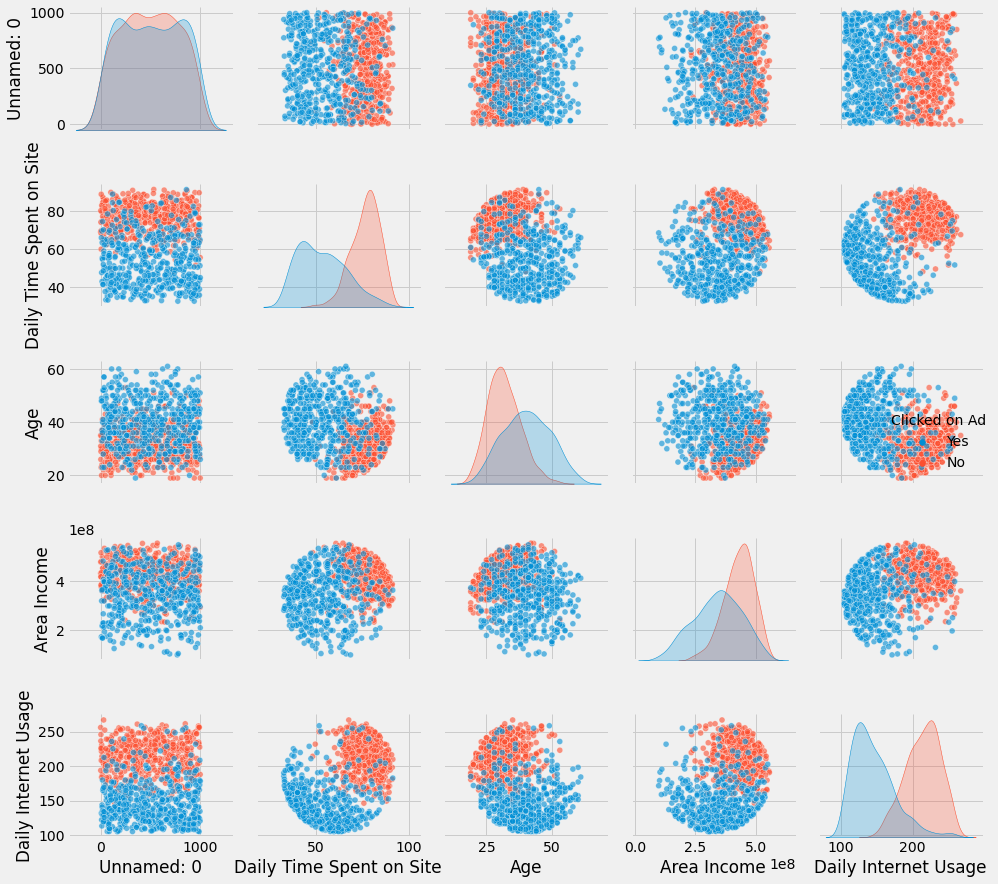

In [38]:
df_sort = df.sort_values(["Clicked on Ad"], ascending = True)
plt.figure(figsize=(20, 20))
ax = sns.pairplot(
    df_sort,
    hue = "Clicked on Ad",
    hue_order = ["Yes", "No"],
    palette = {"Yes":"C0", "No":"C1"},
    kind="scatter", plot_kws={"alpha": 0.6, "edgecolor":"white"},
)
plt.tight_layout()
plt.savefig('num pairplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

### Korelasi Pearson

In [39]:
df.corr()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032307,0.001835,-0.056619,-0.004805
Daily Time Spent on Site,-0.032307,1.000000,-0.329006,0.304718,0.513470
Age,0.001835,-0.329006,1.000000,-0.177965,-0.368997
Area Income,-0.056619,0.304718,-0.177965,1.000000,0.333911
Daily Internet Usage,-0.004805,0.513470,-0.368997,0.333911,1.000000


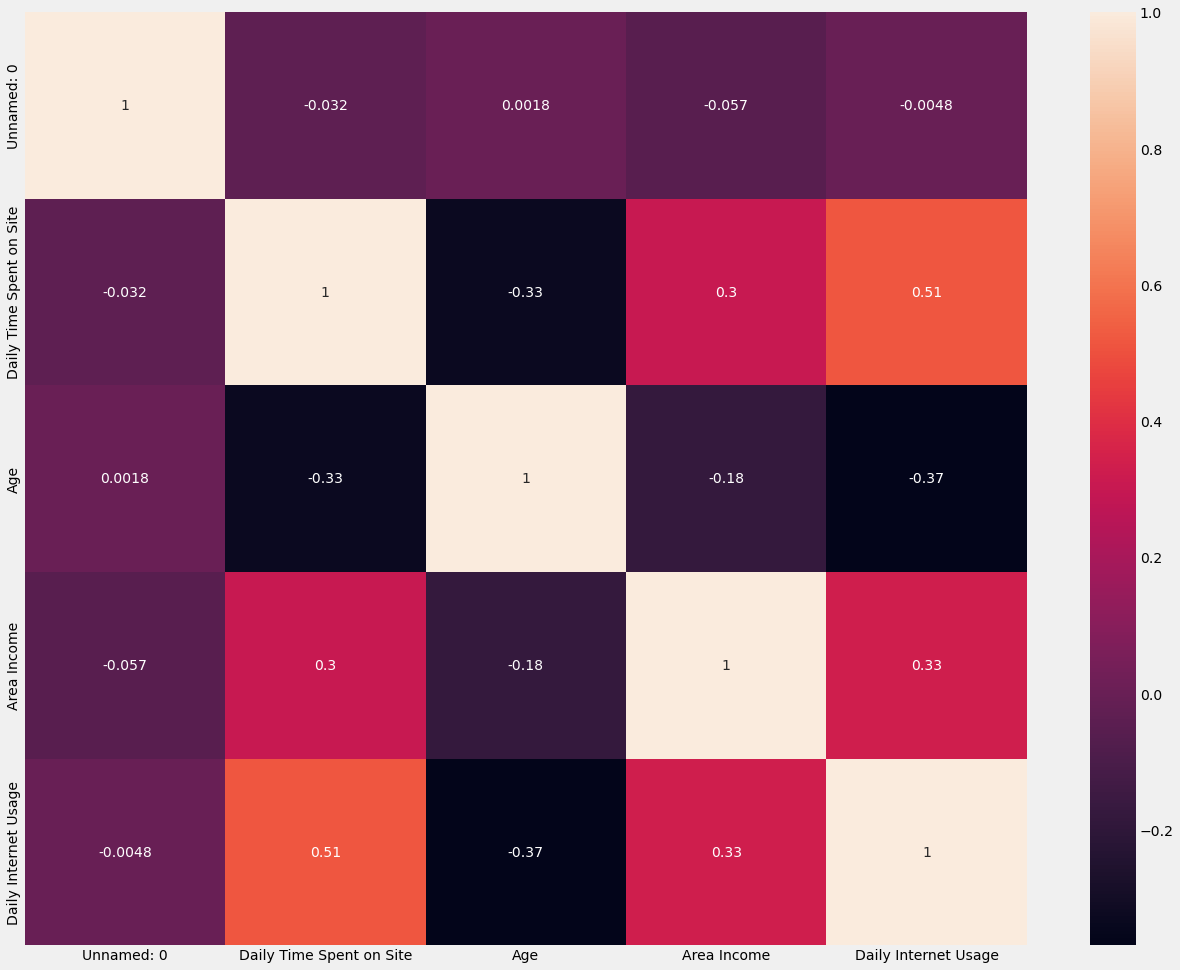

In [40]:
plt.figure(figsize=(20,16))
svm = sns.heatmap(df.corr(),annot=True)
plt.show()
figure = svm.get_figure()    
figure.savefig("heatmap.jpg", dpi=150)

From the correlation results using heatmap, it is not found that there are features that are closely correlated (redundant), so all of the features can be used for modeling. However, by using Pearson correlation, we cannot determine the relationship between features and target variables because the feature target has a categorical type. Therefore, available datasets including categorical variables cannot be used for Pearson correlations. So to reach a relationship all of the features can use PPS (Predictive Power Score) in calculating the relationship between features and their targets

### Correlation using PPScore

In [41]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

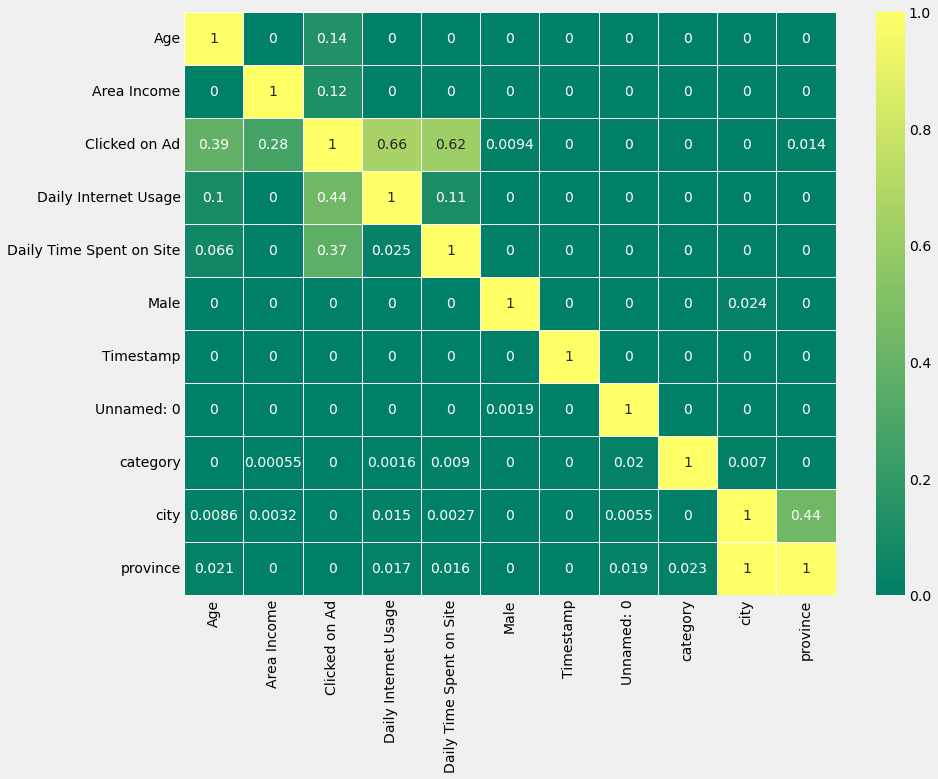

In [42]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="summer", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In the correlation results using PPScore, the features that are quite related to the target (Clicked on Ad) are Daily Internet Usage, Daily Time Spent on Site, Age, Area Income

## Target Variabel

In [43]:
df.groupby(['Clicked on Ad']).count()[['Unnamed: 0']].rename({'count_customer' : 'nunique'}, axis = 1)

,Unnamed: 0
Clicked on Ad,
No,500
Yes,500


The target variable turns out to have a balanced label, so there is no need for preprocessing such as handling balance data using SMOTE to overcome the imbalanced class.

# Data Preprocessing

## Target Variabel

In [44]:
df["target"] = df["Clicked on Ad"].apply(lambda x: 1 if x == "Yes" else 0)
df.drop(columns=["Clicked on Ad"], inplace = True)

In [45]:
df[["target"]]

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


## Feature Extraction

In [46]:
# Extract datetime variables using timestamp column and converting timestamp column into datatime object in order to extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
# Creates a new column called Month
df['Month'] = df['Timestamp'].dt.month 
# Creates a new column called Day
df['Day'] = df['Timestamp'].dt.day     
# Creates a new column called Weekday with sunday as 6 and monday as 0
df["Weekday"] = df['Timestamp'].dt.dayofweek 

# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [47]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,city,province,category,target,Month,Day,Weekday
0,0,68.95,35,432837300.0,256.09,Perempuan,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,3,27,6
1,1,80.23,31,479092950.0,193.77,Laki-Laki,Denpasar,Bali,Food,0,4,4,0
2,2,69.47,26,418501580.0,236.50,Perempuan,Surabaya,Jawa Timur,Electronic,0,3,13,6
3,3,74.15,29,383643260.0,245.89,Laki-Laki,Batam,Kepulauan Riau,House,0,1,10,6
4,4,68.37,35,517229930.0,225.58,Perempuan,Medan,Sumatra Utara,Finance,0,6,3,4


## Handling Outlier Values

In [48]:
print('\nData distribution before outlier handling: ')
print(df[['Area Income','Month', 'Day', 'Weekday']].describe())


Data distribution before outlier handling: 
        Area Income        Month          Day      Weekday
count  1.000000e+03  1000.000000  1000.000000  1000.000000
mean   3.850493e+08     3.817000    15.484000     3.064000
std    9.347971e+07     1.926973     8.734073     1.998474
min    9.797550e+07     1.000000     1.000000     0.000000
25%    3.298201e+08     2.000000     8.000000     1.000000
50%    3.990683e+08     4.000000    15.000000     3.000000
75%    4.566932e+08     5.000000    23.000000     5.000000
max    5.563936e+08     7.000000    31.000000     6.000000


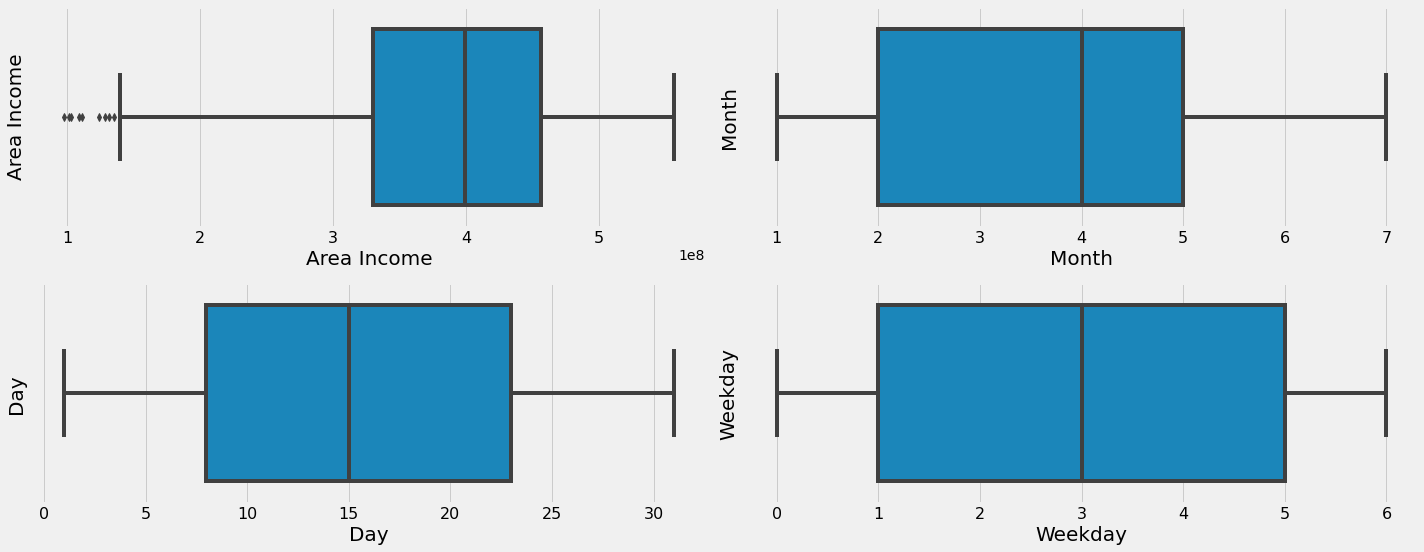

In [49]:
num = ['Area Income','Month', 'Day', 'Weekday']
plt.figure(figsize=(20, 15))
for i in range(len(num)):
    plt.subplot(len(num)//1, 2, i+1)
    ax = sns.boxplot(
        x = df[num[i]]
    )
    ax.set_xlabel(str(num[i]), fontsize = 20)
    ax.set_ylabel(str(num[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig('num boxplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

Previously, EDA has been carried out on the numeric column and there are outliers in the income area variable, therefore it is necessary to handle outliers. In addition, the feature extraction results in the datetime column did not find any outliers

In [50]:
# Handling with IQR 
Q1 = (df[['Area Income']]).quantile(0.25)
Q3 = (df[['Area Income']]).quantile(0.75)

IQR = Q3 - Q1
print('The IQR value of each variable is: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Maximum Value of each Variable is:')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nManimum Value of each Variable is:')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df .mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nData distribution after outlier handling: ')
print(df[['Area Income']].describe())

The IQR value of each variable is: 
Area Income    126873075.0
dtype: float64
Maximum Value of each Variable is:
Area Income    647002825.0
dtype: float64

Manimum Value of each Variable is:
Area Income    139510525.0
dtype: float64

Data distribution after outlier handling: 
        Area Income
count  1.000000e+03
mean   3.852616e+08
std    9.288397e+07
min    1.395105e+08
25%    3.298201e+08
50%    3.990683e+08
75%    4.566932e+08
max    5.563936e+08


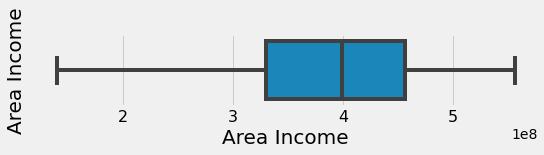

In [51]:
num = ['Area Income']
plt.figure(figsize=(15, 2))
for i in range(len(num)):
    plt.subplot(len(num)//1, 2, i+1)
    ax = sns.boxplot(
        x = df[num[i]]
    )
    ax.set_xlabel(str(num[i]), fontsize = 20)
    ax.set_ylabel(str(num[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig('num boxplot.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

## Feature Selection
Based on the multivariate EDA, there is no feature that is highly correlated (redundant). Therefore, to create modeling machine learning is used in all features to see performance results, except Unnamed: 0 which only contains unique customer numbers and has no effect on the target. City and province columns that have high cardinality values also need to be removed so that there is no curse of dimensionality. Feature reduction will be carried out if the results of the matrix or performance obtained are not optimal.

In [52]:
# Drop feature unused
df.drop(columns=['Unnamed: 0','city','province'],inplace = True)

## Feature Encoding

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   category                  1000 non-null   object 
 6   target                    1000 non-null   int64  
 7   Month                     1000 non-null   int64  
 8   Day                       1000 non-null   int64  
 9   Weekday                   1000 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 78.2+ KB


In [54]:
for cat in ['Male', 'category']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

- Remove outdated columns after feature encoding

In [55]:
df = df.drop(columns= ['Male', 'category'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   target                    1000 non-null   int64  
 5   Month                     1000 non-null   int64  
 6   Day                       1000 non-null   int64  
 7   Weekday                   1000 non-null   int64  
 8   Male_Laki-Laki            1000 non-null   uint8  
 9   Male_Perempuan            1000 non-null   uint8  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

## Split Dataset

In [56]:
X = df.drop(columns=['target'])
y = df['target'] # target / label

- Split to train 70% and test 30%.

In [57]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Machine learning model before normalization/standardization

After performing EDA, it is shown that the target features in the dataset are balanced so that to determine the evaluation matrix, accuracy can be used. Function Initiation:

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [59]:
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
logreg_grid = GridSearchCV(logres, hyperparameters, cv=5, scoring='accuracy')

# Fitting Model & Evaluation
logreg_grid.fit(X_train, y_train)
y_pred = logreg_grid.predict(X_test)
eval_classification(logreg_grid)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.90
Precision (Train Set): 0.95
Precision (Test Set): 0.97
Recall (Train Set): 0.87
Recall (Test Set): 0.84
AUC (test-proba): 0.96
AUC (train-proba): 0.97


In [60]:
show_best_hyperparameter(logreg_grid)

{'C': 0.0001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
#Re-iteration with the best parameters after the absence of overfitting and underfitting
lr_tuned = LogisticRegression(random_state=42,
                              C=0.0001,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(X_train, y_train)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.90
Precision (Train Set): 0.95
Precision (Test Set): 0.97
Recall (Train Set): 0.87
Recall (Test Set): 0.84
AUC (test-proba): 0.96
AUC (train-proba): 0.97


### Decision Tree

In [62]:
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_test)
eval_classification(dtc_grid)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.92
Precision (Train Set): 0.94
Precision (Test Set): 0.91
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.92
AUC (train-proba): 0.95


In [63]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [64]:
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=3, 
                                   min_samples_split=2,
                                   min_samples_leaf= 1,
                                   max_features='auto',
                                   criterion='gini').fit(X_train, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.91
Precision (Train Set): 0.92
Precision (Test Set): 0.96
Recall (Train Set): 0.85
Recall (Test Set): 0.86
AUC (test-proba): 0.94
AUC (train-proba): 0.93


### Random Forest

In [66]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 5, 7], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# Initiation model
rfc=RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)
eval_classification(rfc_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [67]:
show_best_hyperparameter(rfc_grid)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [68]:
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=110, 
                                   max_depth=2, 
                                   criterion='gini',
                                   max_features= 'auto',
                                   min_samples_split=9, 
                                   min_samples_leaf=3).fit(X_train, y_train)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.95
Precision (Train Set): 0.97
Precision (Test Set): 0.96
Recall (Train Set): 0.93
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 0.99


### K-Nearest Neighbors

In [69]:
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(X_train, y_train)
y_pred = knn_grid.predict(X_test)
eval_classification(knn_grid)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.68
Precision (Train Set): 0.78
Precision (Test Set): 0.75
Recall (Train Set): 0.64
Recall (Test Set): 0.58
AUC (test-proba): 0.72
AUC (train-proba): 0.80


In [70]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}


In [71]:
knn_tuned = KNeighborsClassifier(n_neighbors =24, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(X_train, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.68
Precision (Train Set): 0.78
Precision (Test Set): 0.75
Recall (Train Set): 0.64
Recall (Test Set): 0.58
AUC (test-proba): 0.72
AUC (train-proba): 0.80


### AdaBoost

In [72]:
# List of hyperparameter
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')

# Predict & Evaluation
ab_grid.fit(X_train,y_train)
y_pred = ab_grid.predict(X_test)
eval_classification(ab_grid)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.93
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [73]:
show_best_hyperparameter(ab_grid)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 60, 'random_state': 42}


In [74]:
ab_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=60,
                               learning_rate=1, 
                               algorithm = 'SAMME.R').fit(X_train,y_train)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.93
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Gradient Boosting

In [75]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}


grad = GradientBoostingClassifier(random_state=42)
grad_grid = GridSearchCV(estimator=grad, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
grad_grid.fit(X_train, y_train)
y_pred = grad_grid.predict(X_test)
eval_classification(grad_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [76]:
show_best_hyperparameter(grad_grid)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [77]:
grad_tuned = GradientBoostingClassifier(max_depth= 2, 
                               min_samples_split=2,
                               min_samples_leaf =2,
                               n_estimators=50,
                               max_features='auto',
                               criterion='friedman_mse',
                               learning_rate=0.1,
                               loss='exponential',
                               subsample = 1.0).fit(X_train,y_train)
eval_classification(grad_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Result Experiment 1
Define Model:

In [78]:
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned
models_dict["Decision Tree"] = dt_tuned
models_dict["Random Forest"] = rf_tuned
models_dict["KNearest Neighbors"] = knn_tuned
models_dict["AdaBoost"] = ab_tuned
models_dict["Gradient Boosting"] = grad_tuned

In [79]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train,y_train)

Training model Logistic Regression
Wall time: 331 ms
Training model Decision Tree
Wall time: 4.2 ms
Training model Random Forest
Wall time: 141 ms
Training model KNearest Neighbors
Wall time: 6.39 ms
Training model AdaBoost
Wall time: 88.4 ms
Training model Gradient Boosting
Wall time: 58.3 ms


**Evaluation**

In [80]:
# create list to store prediciton results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict 
    model_pred_test = model.predict(X_test)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 14.92 ms
Model on Decision Tree
elapsed time: 3.38 ms
Model on Random Forest
elapsed time: 29.26 ms
Model on KNearest Neighbors
elapsed time: 85.42 ms
Model on AdaBoost
elapsed time: 16.0 ms
Model on Gradient Boosting
elapsed time: 2.0 ms


In [81]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(models_dict.keys())
# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results1 = pd.DataFrame(data=eval_dict)
df_results1 = df_results1.set_index("model")
df_results1.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Gradient Boosting,0.948052,0.973988,0.950000,0.978571,2.00
Random Forest,0.935065,0.930636,0.946667,0.952857,29.26
AdaBoost,0.928571,0.988439,0.950000,0.994286,16.00
Decision Tree,0.863636,0.846821,0.910000,0.888571,3.38
Logistic Regression,0.837662,0.867052,0.903333,0.912857,14.92
KNearest Neighbors,0.577922,0.641618,0.683333,0.731429,85.42


The performance results of modeling using the initial dataset without normalizing/standardizing are as follows:
- Almost all models of performance result values between test and train do not have too large a gap (overfitting/underfitting) due to using the appropriate parameters.
- From the modeling results on the test, the accuracy value is greater in the AdaBoost and Gradient Boosting models.
- Apart from the accuracy, the recall results on the test also show better on the Gradient Boosting model with the time elapsed it takes the model to predict is also the fastest time than other models, namely 2.00
- For some models such as k-nearest neighbor the resulting accuracy and recall are not good enough.

# Machine learning model after normalization/standardization
Standardize/normalize all features including the target feature using the MinMax Scaler after the data has been split between test and train, this is to ensure that there is no leakage of information about the mean and median to the train data. Scaling is also done on the test data so that we can test and evaluate whether the model can be generalized again.

In [82]:
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test_norm)
    y_pred_train = model.predict(X_train_norm)
    y_pred_proba = model.predict_proba(X_test_norm)
    y_pred_proba_train = model.predict_proba(X_train_norm)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [86]:
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
logreg_grid = GridSearchCV(logres, hyperparameters, cv=5, scoring='accuracy')

# Fitting Model & Evaluation
logreg_grid.fit(X_train_norm, y_train)
y_pred = logreg_grid.predict(X_test_norm)
eval_classification(logreg_grid)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.90
Recall (Test Set): 0.89
AUC (test-proba): 0.99
AUC (train-proba): 0.99


In [87]:
show_best_hyperparameter(logreg_grid)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [88]:
#Iteration with the best parameters before normalization/standarizationg
lr_tuned = LogisticRegression(random_state=42,
                              C=0.002,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(X_train_norm, y_train)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.90
Recall (Test Set): 0.89
AUC (test-proba): 0.99
AUC (train-proba): 0.99


### Decision Tree

In [90]:
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(X_train_norm, y_train)
y_pred = dtc_grid.predict(X_test_norm)
eval_classification(dtc_grid)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.92
Precision (Train Set): 0.94
Precision (Test Set): 0.91
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.92
AUC (train-proba): 0.95


In [91]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [92]:
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=2, 
                                   min_samples_split=2,
                                   min_samples_leaf= 1,
                                   max_features='auto',
                                   criterion='gini').fit(X_train_norm, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.92
Precision (Train Set): 0.94
Precision (Test Set): 0.91
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.92
AUC (train-proba): 0.95


### Random Forest

In [93]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 7, 9], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# Initiation model
rfc=RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
rfc_grid.fit(X_train_norm, y_train)
y_pred = rfc_grid.predict(X_test_norm)
eval_classification(rfc_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [94]:
show_best_hyperparameter(rfc_grid)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [95]:
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=110, 
                                   max_depth=2, 
                                   criterion='gini',
                                   max_features= 'auto',
                                   min_samples_split=9, 
                                   min_samples_leaf=2).fit(X_train_norm, y_train)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.93
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 0.99


### K-Nearest Neighbors

In [96]:
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(X_train_norm, y_train)
y_pred = knn_grid.predict(X_test_norm)
eval_classification(knn_grid)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.91
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.94
Recall (Test Set): 0.86
AUC (test-proba): 0.97
AUC (train-proba): 0.99


In [97]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [98]:
knn_tuned = KNeighborsClassifier(n_neighbors =7, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(X_train_norm, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.91
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.94
Recall (Test Set): 0.86
AUC (test-proba): 0.97
AUC (train-proba): 0.99


### AdaBoost

In [99]:
# List of hyperparameter
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')

# Predict & Evaluation
ab_grid.fit(X_train_norm,y_train)
y_pred = ab_grid.predict(X_test_norm)
eval_classification(ab_grid)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.93
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [100]:
show_best_hyperparameter(ab_grid)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 60, 'random_state': 42}


In [101]:
ab_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=60,
                               learning_rate=1, 
                               algorithm = 'SAMME.R').fit(X_train_norm,y_train)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.93
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Gradient Boosting

In [102]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}


grad = GradientBoostingClassifier(random_state=42)
grad_grid = GridSearchCV(estimator=grad, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
grad_grid.fit(X_train_norm, y_train)
y_pred = grad_grid.predict(X_test_norm)
eval_classification(grad_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [103]:
show_best_hyperparameter(grad_grid)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [104]:
grad_tuned = GradientBoostingClassifier(max_depth= 2, 
                               min_samples_split=2,
                               min_samples_leaf =2,
                               n_estimators=50,
                               max_features='auto',
                               criterion='friedman_mse',
                               learning_rate=0.1,
                               loss='exponential',
                               subsample = 1.0).fit(X_train_norm,y_train)
eval_classification(grad_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Result Experiment 2
Define Model:

In [134]:
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned
models_dict["Decision Tree"] = dt_tuned
models_dict["Random Forest"] = rf_tuned
models_dict["KNearest Neighbors"] = knn_tuned
models_dict["AdaBoost"] = ab_tuned
models_dict["Gradient Boosting"] = grad_tuned

In [106]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_norm, y_train)

Training model Logistic Regression
Wall time: 99.3 ms
Training model Decision Tree
Wall time: 4.2 ms
Training model Random Forest
Wall time: 101 ms
Training model KNearest Neighbors
Wall time: 4.1 ms
Training model AdaBoost
Wall time: 81.3 ms
Training model Gradient Boosting
Wall time: 38.1 ms


In [107]:
# create list to store prediciton results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict 
    model_pred_test = model.predict(X_test_norm)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train_norm)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 5.0 ms
Model on Decision Tree
elapsed time: 1.38 ms
Model on Random Forest
elapsed time: 23.91 ms
Model on KNearest Neighbors
elapsed time: 72.24 ms
Model on AdaBoost
elapsed time: 16.73 ms
Model on Gradient Boosting
elapsed time: 0.99 ms


In [108]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(models_dict.keys())
# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results2 = pd.DataFrame(data=eval_dict)
df_results2 = df_results2.set_index("model")
df_results2.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Gradient Boosting,0.948052,0.973988,0.950000,0.978571,0.99
Decision Tree,0.948052,0.956647,0.923333,0.950000,1.38
Random Forest,0.935065,0.930636,0.943333,0.952857,23.91
AdaBoost,0.928571,0.988439,0.950000,0.994286,16.73
Logistic Regression,0.889610,0.904624,0.940000,0.951429,5.00
KNearest Neighbors,0.857143,0.936416,0.913333,0.964286,72.24


The result of the performance model after applying the Min-Max Scaler to the dataset that has been separated for test and train:

- There is a significant increase in several models, especially for the k-nearest neighbor model.
- There is a change in result best performance, the results of the highest test accuracy are in the Gradient Boosting and AdaBoost models.
- Meanwhile, based on the results of the recall test, the highest was found in the Gradient Boosting and Decision Tree models.
- Based on the experimental results, the second model chosen is Gradient Boosting because it has high accuracy and recall value in addition to the time required to predict is also the fastest among other models.

# Model Evaluation

## Confusion Matrix

**Gradient Boosting**

Text(0.5, 1.0, 'Confusion Matrix Gradient Boosting')

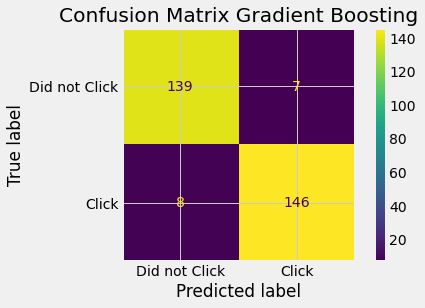

In [124]:
plot_confusion_matrix(models_dict["Gradient Boosting"], X_test_norm, y_test, values_format='d', display_labels=['Did not Click','Click'])
plt.title("Confusion Matrix Gradient Boosting")

From the results of the Confusion Matrix, it is known that the model predicts more users who click on ads because in previous matrix evaluation, in addition to considering the high accuracy value, it also considers recall performance, namely customers who click on ads and can be predicted correctly.

The confusion matrix produced by Gradient Boosting is very good. We can see that there are very few prediction errors in purple cells (top right and bottom left).

With the following results, we will get good accuracy and recall.

# Feature Importance

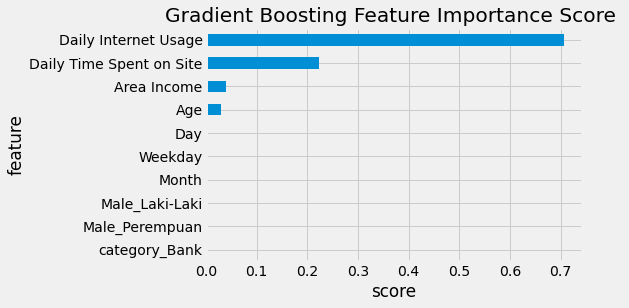

In [135]:
feature_importance(models_dict["Gradient Boosting"], 'Gradient Boosting')
plt.show() 

By using the Gradient Boosting model we are able to see the most important features in building the model.

Based on the Gradient Boosting method, we can see that daily internet usage is a very important feature in determining whether a user will click or not. Other important features are daily time spent on site, age, and income of an area.

# Business Recommendation

## Feature Based

Based on EDA and feature importance, it can be concluded that:
- The data we get has 2 user segments, namely active and non-active user segments, where active users have the characteristics of users who often use the internet and often visit the website of a product, besides that they have a higher income with an age range of 20-40.
- While non-active users are rarely the opposite of active users.
- Non-active users tend to be more easily attracted to clicking on product ads on digital ads, compared to non-active users.
- Middle old is a potential market for the digital market.

Action points:
- We can change the method of advertising products such as not showing too much advertising so that it can attract the attention of active users.

## Model Based - Simulation
By using the ML model that has been created, we can make the following simulations::

**Target Variabel**:

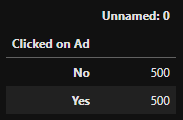

Assumption:

- To advertise a user can use a budget of Rp.1000 
- Using the initial dataset as a simulation implementation with a total of 1000 users, in each class as many as 500 users.
- Every user who converts us will get a profit of Rp.5000 

**Without Machine Learning Model**

- Perhitungan Cost:

Cost = cost ads * n user

Cost = Rp. 1000 * 1000

Cost = Rp. 1.000.000

- While the conversion rate that we will get is 50%
- Because there are only 500 converts, we will get 500 * Rp.5000 = Rp 2.500.000
- Revenue = Rp 2.500.000
- Profit = Rp 2.500.000 - Rp. 1.000.000 = Rp. 1.500.000
Based on the simulation above, if we don't use a machine learning model, we will get 1.5 million in revenue

**By Using ML Model**
Based on the expected performance, we get 95% results on the test results, so when applied to the initial dataset, we will get 950 users who convert based on users with the potential characteristic to click on advertising products.

- With the same cost of ads, which is 1 million
- While the conversion rate that will be obtained is 95% (950 user convert)

- Then we will get 950 * Rp.5000 = Rp.4.750.000
- Revenue= Rp. 4.750.000
- Profit= Rp. 4.750.000 - Rp. 1.000.000 =3.750.000
Based on the simulation above, if we don't use a machine learning model, then we will get revenue 1.5 m and with use ML the revenue increasing significanlty more two times.
**In conclusion, ML can work well into potential revenue**

